#Importing the packages

In [158]:
# Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# Data processing, metrics and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics




#Loading of Data

In [159]:
# read the data from the excel file into a dataframe
df = pd.read_excel('dataset.xlsx')

#Exploratory data analysis (EDA)

Checking the Head of data

In [160]:
# checking first ten rows of our dataset
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting Info of the Dataset

In [161]:
# Getting information from the dataset for the predictor and target variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB
None


Finding and Visualizing differnt Data Types in Dataset

Data type: int64
['Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)']

Data type: float64
['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Mycoplasma pneumoniae', 'Neutrophils', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium', 'Alanine transaminase', 'Aspartate transaminase', 'Gamma-glutamyltransferase', 'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium', 'Magnesium', 'pCO2 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Base excess (venous blood gas analysis)', 

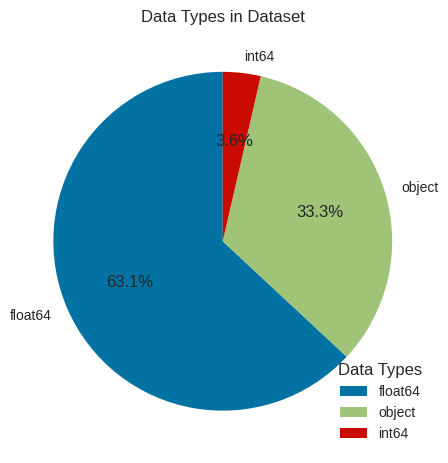

In [162]:
# Group the columns by their data type
grouped = df.columns.to_series().groupby(df.dtypes)


# Print the columns for each data type
for dtype, columns in grouped:
    print(f'Data type: {dtype}')
    print(columns.tolist())
    print()
    
# Differnt Data Types Visualization in Pie Chart
col_count = df.dtypes.value_counts()
plt.pie(col_count, labels=col_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Data Types in Dataset')
plt.legend(title='Data Types', loc='best')
plt.show()

In [163]:
# Finding the percentage of null values in each column
null_percentage = df.isnull().mean() * 100
print(null_percentage)

Patient ID                                                0.000000
Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
                                                           ...    
HCO3 (arterial blood gas analysis)                       99.521616
pO2 (arterial blood gas analysis)                        99.521616
Arteiral Fio2                                            99.645641
Phosphor                                                 99.645641
ctO2 (arterial blood gas analysis)                       99.521616
Length: 111, dtype: float64


Finding the Shape of Dataset

In [164]:
print("Dataset Shape : ",df.shape)

Dataset Shape :  (5644, 111)


#Cleaning the data


Deleting Columns that have 100% Null Values

## Null Columns Handling

In [165]:
# finding columns with 100% null values
null_cols = df.columns[df.isnull().sum() == df.shape[0]]

# dropping the columns with 100% null values
df = df.drop(null_cols, axis=1)

print("Dataset Shape : ",df.shape)

Dataset Shape :  (5644, 106)


Removing the Columns that have more than 90% Null values






In [166]:
# Calculate the percentage of missing values for each column
missing_perc = df.isna().sum() / len(df) * 100

# Identify columns with more than 80% missing values
cols_to_drop = [col for col in df.columns if missing_perc[col] > 90]

# Drop the columns with more than 80% missing values
df = df.drop(cols_to_drop, axis=1)

print("Reduced Dataset Shape : ",df.shape)

Reduced Dataset Shape :  (5644, 39)


Dropping the Columns that are not considered for the analysis

In [167]:
# dropping the unnecessery columns which are not included in this analysis 
df.drop(columns=['Patient ID',"Patient addmited to regular ward (1=yes, 0=no)",
           "Patient addmited to semi-intensive unit (1=yes, 0=no)",
           "Patient addmited to intensive care unit (1=yes, 0=no)",
           'Respiratory Syncytial Virus',
            'Influenza A',
            'Influenza B',
            'Parainfluenza 1',
            'CoronavirusNL63',
            'Rhinovirus/Enterovirus',
            'Coronavirus HKU1',
            'Parainfluenza 3',
            'Chlamydophila pneumoniae',
            'Adenovirus',
            'Parainfluenza 4',
            'Coronavirus229E',
            'CoronavirusOC43',
            'Inf A H1N1 2009',
            'Bordetella pertussis',
            'Metapneumovirus',
            'Parainfluenza 2',
], inplace=True)

print("Reduced Dataset Shape : ",df.shape)

Reduced Dataset Shape :  (5644, 18)


Heatmap Analysis after initial cleaning of data

<Axes: >

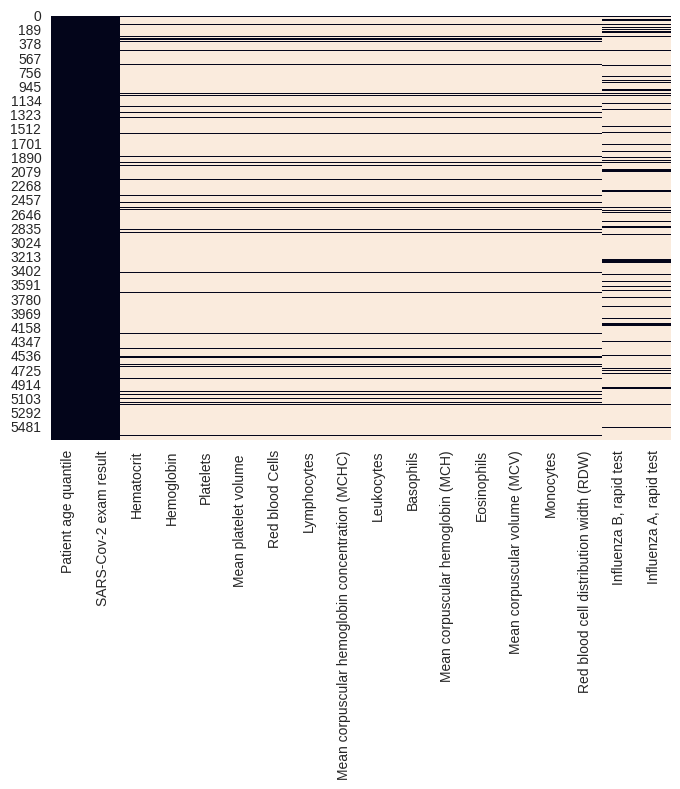

In [168]:
sns.heatmap(df.isna(),cbar=False)

Finding the Null values in the dataset in each Column

In [169]:
df.isnull().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Influenza B, rapid test                             4824
Influenza A, rapid test        

##Converting Data Types

Converting object Data Types to Numerical Values as 0 and 1

In [170]:
# Replace 'negative' and 'positive' with 0 and 1, respectively and storing their values in SARS-Cov-2 exam result
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].replace(['negative', 'positive'], [0, 1])

# Converting other object data into numericals
df.replace('not_detected', 0, inplace=True)
df.replace('detected', 1, inplace=True)
df.replace('absent', 0, inplace=True)
df.replace('present', 1, inplace=True)
df.replace('negative', 0, inplace=True)
df.replace('positive', 1, inplace=True)

<Axes: xlabel='SARS-Cov-2 exam result', ylabel='count'>

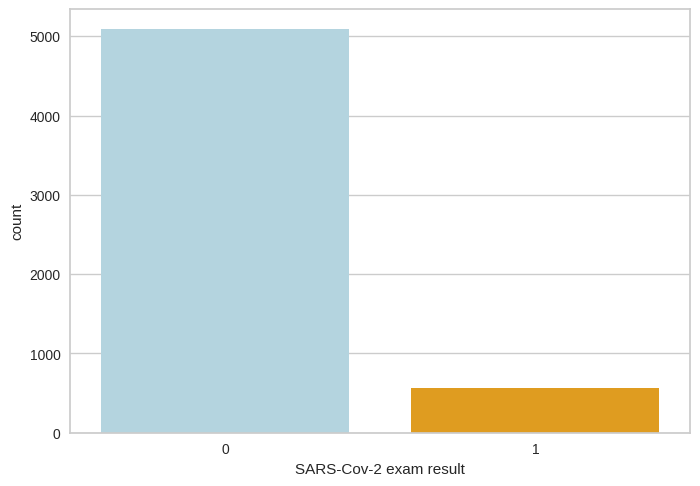

In [171]:
# Plot the countplot with blue for 0 and orange for 1
sns.countplot(x='SARS-Cov-2 exam result', data=df, palette={0: "lightblue", 1: "orange"})

In [172]:
#Getting Negitive and Positive values Count 
df['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

##Handling of Missiong Data

In [173]:
# Droping all the rows with Null values
#dataset = df.dropna()

# set seed for reproducibility
np.random.seed(123)

# randomly drop 70% of empty rows
dataset = df.dropna(thresh=df.shape[1]*(1-0.3)).copy()

print("Reduced Data after removing Null Values : ", dataset.shape)

Reduced Data after removing Null Values :  (602, 18)


In [174]:
# Replace the null values by 0
dataset = dataset.fillna(value=0)

print(dataset.shape)

(602, 18)


In [175]:
#Checking head of Data after removing Null Values
dataset.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0
8,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0
15,9,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.0,1.0
18,11,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.0,0.0
22,9,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0,0.0


## Standardization of Data

Standardzing the Negtive values in a rows to '0'

In [176]:
#Standardizing the negitive values to 0
dataset[dataset < 0] = 0

In [177]:
#Checking head of Data after Standardization
dataset.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0.236515,0.000000,0.000000,0.010677,0.102004,0.318366,0.000000,0.00000,0.000000,0.000000,1.482158,0.166192,0.357547,0.000000,0.0,0.0
8,1,0,0.000000,0.000000,1.429667,0.000000,0.000000,0.000000,3.331071,0.36455,0.000000,0.178175,1.018625,0.000000,0.068652,0.000000,0.0,0.0
15,9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542882,0.00000,0.081693,1.746323,0.000000,1.668409,1.276759,0.000000,0.0,1.0
18,11,0,0.991838,0.792188,0.072992,0.000000,0.542763,0.045436,0.000000,0.00000,0.000000,0.334989,0.000000,0.606842,0.000000,0.171035,0.0,0.0
22,9,0,0.190738,0.000000,0.000000,1.020415,0.000000,0.002791,0.000000,0.00000,0.387152,0.000000,0.000000,0.566783,2.012129,0.613318,0.0,0.0


Vizualizing the SARS-Cov-2 exam result

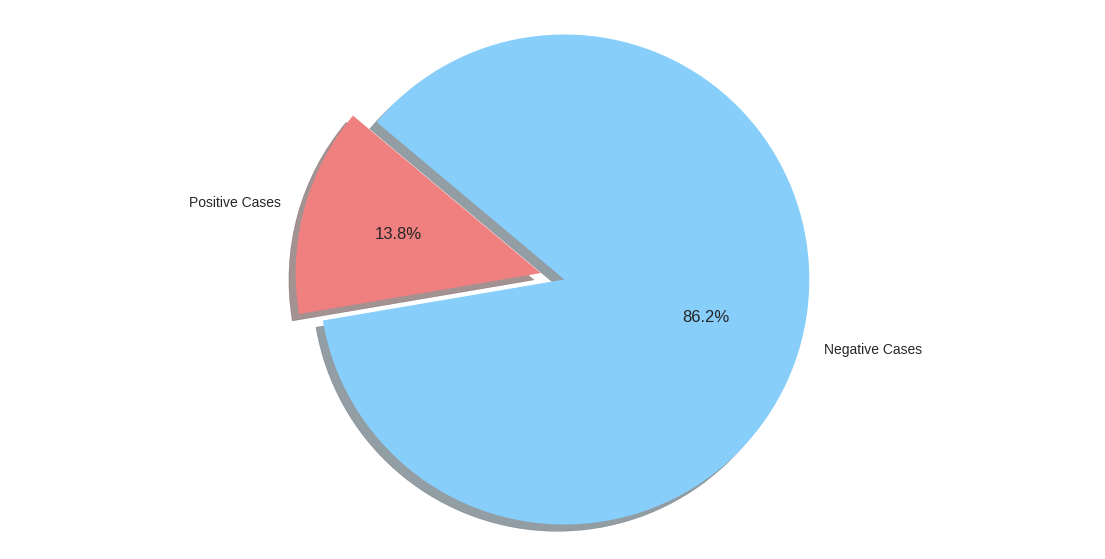

In [178]:
# visualize positive cases vs negative cases
dataset_negative = dataset['SARS-Cov-2 exam result'] == 0
dataset_positive = dataset['SARS-Cov-2 exam result'] == 1

# data to plot
labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
# explode 1st slice
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


Getting the data columns for Feature Selection

#Feature Selection

In [179]:
dataset.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [180]:
#Feature Selction of Data

# visualize the relationship between the data points using heatmap
corr_matrix = abs(dataset.corr())

# correlation with target variable
corr_target = corr_matrix["SARS-Cov-2 exam result"]

# selecting highly correlated features
relevant_features = [
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Monocytes',
       'Red blood cell distribution width (RDW)','Influenza B, rapid test',
       'Influenza A, rapid test']


Correlation before Feature Selection

<Axes: >

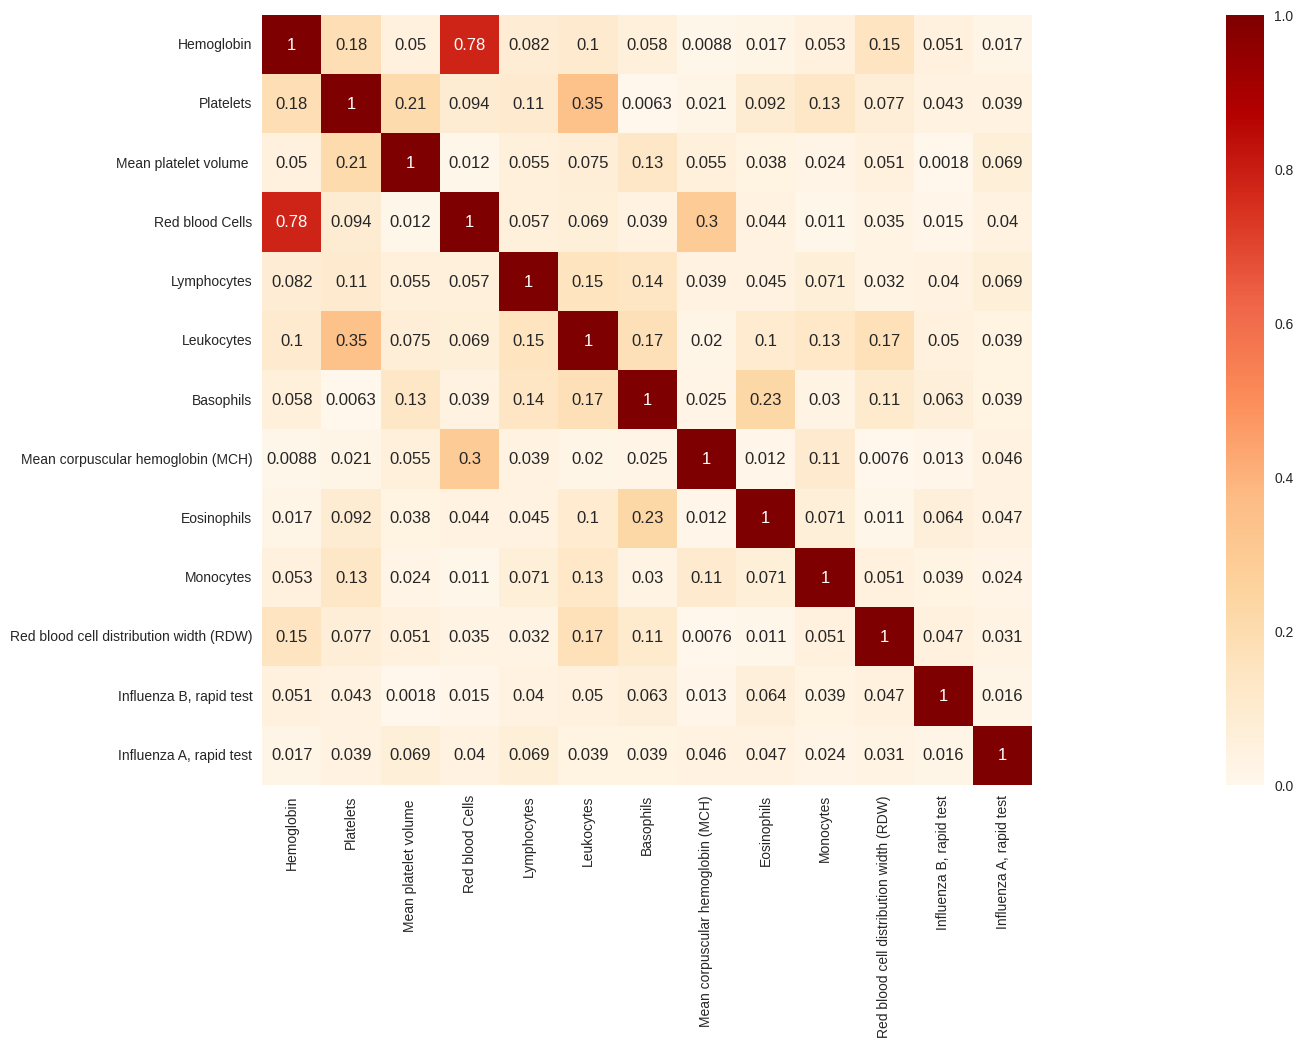

In [181]:
#Feature Selction of Data

# visualize the relationship between the data points using heatmap
corr_matrix = abs(dataset.corr())

# correlation with target variable
corr_target = corr_matrix["SARS-Cov-2 exam result"]

# selecting highly correlated features
relevant_features = [
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Monocytes',
       'Red blood cell distribution width (RDW)','Influenza B, rapid test',
       'Influenza A, rapid test']



#Plotting the heatmap of Correlation
fig, axs = plt.subplots(figsize=(50, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')


##Feature Seletion of top 5 features using Random Forest Classifier

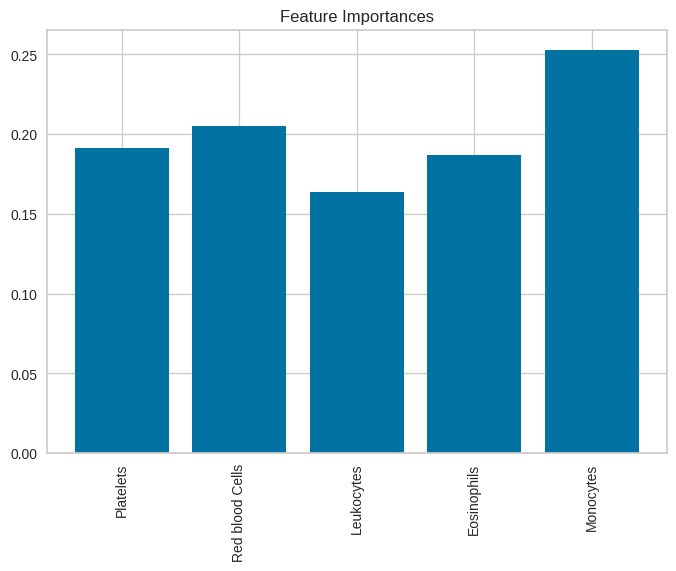

In [182]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


# Define the features and target variable
X = dataset.drop(columns=['SARS-Cov-2 exam result'])
y = dataset['SARS-Cov-2 exam result']

# Visualize the relationship between the data points using heatmap
corr_matrix = abs(dataset.corr())

# Correlation with target variable
corr_target = corr_matrix["SARS-Cov-2 exam result"]

# Selecting highly correlated features
relevant_features = [
    'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
    'Lymphocytes', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
    'Eosinophils', 'Monocytes', 'Red blood cell distribution width (RDW)',
    'Influenza B, rapid test', 'Influenza A, rapid test']

# Select the relevant features
selected_features = []
for feature in relevant_features:
    if corr_target[feature] > 0.1:
        selected_features.append(feature)
        
# Create a new dataframe with only the selected features
X_selected = X[selected_features]

# Define the RandomUnderSampler to address class imbalance
rus = RandomUnderSampler()

# Define the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline with RandomUnderSampler and RandomForestClassifier
pipeline = make_pipeline(rus, rf)

# Fit the pipeline to the selected features
pipeline.fit(X_selected, y)

# Extract the feature importances from the fitted pipeline
importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names from the selected features
feature_names = X_selected.columns

# Create a bar plot to visualize the feature importances
plt.bar(range(len(feature_names)), importances)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Feature Importances')
plt.show()

##Correlation

Correlation After Feature Selection

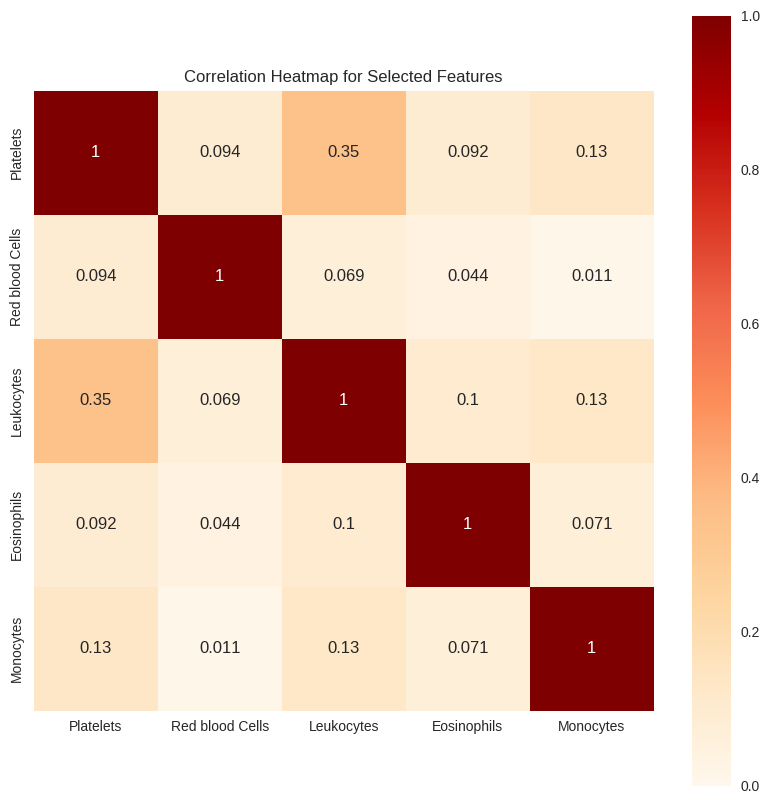

In [183]:
# Plotting the heatmap of correlation for relevant features
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(X_selected.corr()), yticklabels=selected_features, xticklabels=selected_features, vmin=0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


#Balncing the classes

Negative: 519 (9.2%)
Positive: 83 (1.47%)


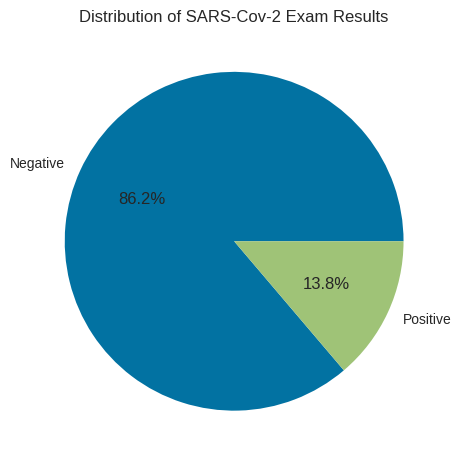

In [184]:
# Count and Percentage of negative and positive

print('Negative: {} ({}%)'.format(dataset['SARS-Cov-2 exam result'].value_counts()[0], round(dataset['SARS-Cov-2 exam result'].value_counts()[0]/len(df)*100, 2)))
print('Positive: {} ({}%)'.format(dataset['SARS-Cov-2 exam result'].value_counts()[1], round(dataset['SARS-Cov-2 exam result'].value_counts()[1]/len(df)*100, 2)))


# Plotting a pie chart of Percentage
negative_count = dataset['SARS-Cov-2 exam result'].value_counts()[0]
positive_count = dataset['SARS-Cov-2 exam result'].value_counts()[1]
plt.pie([negative_count, positive_count], labels=['Negative', 'Positive'], autopct='%1.1f%%')
plt.title('Distribution of SARS-Cov-2 Exam Results')
plt.show()

##Resampling

In [185]:
# Applying Over Sampling on Positive values 

from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = dataset.drop(columns=['SARS-Cov-2 exam result'])
y = dataset['SARS-Cov-2 exam result']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the class distribution after resampling
print(y_resampled.value_counts())


0    519
1    519
Name: SARS-Cov-2 exam result, dtype: int64


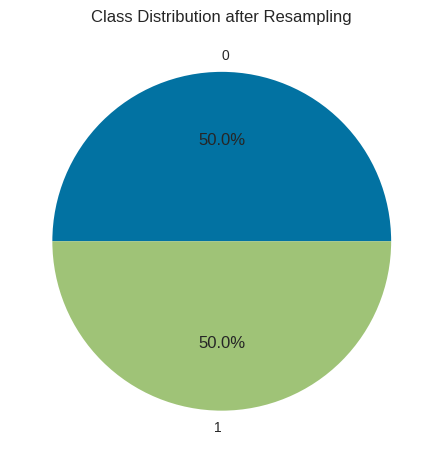

In [186]:
# Get the value counts of the resampled target variable
class_counts = y_resampled.value_counts()

# Create a pie chart of the class distribution
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution after Resampling')
plt.show()

# Split Train-Test

In [187]:
# Split dataset into training and testing sets into 70/30 Train - Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)




# Model

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Fit Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Fit Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Fit Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Fit K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


#Evaluation

## Accuracy

In [189]:

# Evaluate classifiers
print("Random Forest Classifier:")
print(classification_report(y_test, rf_pred))
print("Accuracy score:", accuracy_score(y_test, rf_pred))
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Classifier confusion matrix:")
print(rf_cm)
print("\n")

print("Support Vector Classifier:")
print(classification_report(y_test, svc_pred))
print("Accuracy score:", accuracy_score(y_test, svc_pred))
svc_cm = confusion_matrix(y_test, svc_pred)
print("Support Vector Classifier confusion matrix:")
print(svc_cm)
print("\n")

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_pred))
print("Accuracy score:", accuracy_score(y_test, lr_pred))
lr_cm = confusion_matrix(y_test, lr_pred)
print("Logistic Regression Classifier confusion matrix:")
print(lr_cm)
print("\n")

print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_pred))
print("Accuracy score:", accuracy_score(y_test, knn_pred))
knn_cm = confusion_matrix(y_test, knn_pred)
print("K-Nearest Neighbors Classifier confusion matrix:")
print(knn_cm)
print("\n")


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       166
           1       0.89      1.00      0.94       146

    accuracy                           0.94       312
   macro avg       0.95      0.95      0.94       312
weighted avg       0.95      0.94      0.94       312

Accuracy score: 0.9423076923076923
Random Forest Classifier confusion matrix:
[[148  18]
 [  0 146]]


Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       166
           1       0.65      0.89      0.75       146

    accuracy                           0.72       312
   macro avg       0.75      0.73      0.72       312
weighted avg       0.76      0.72      0.72       312

Accuracy score: 0.7243589743589743
Support Vector Classifier confusion matrix:
[[ 96  70]
 [ 16 130]]


Logistic Regression Classifier:
              precision    recall  f1-score   support


##ROC Curve

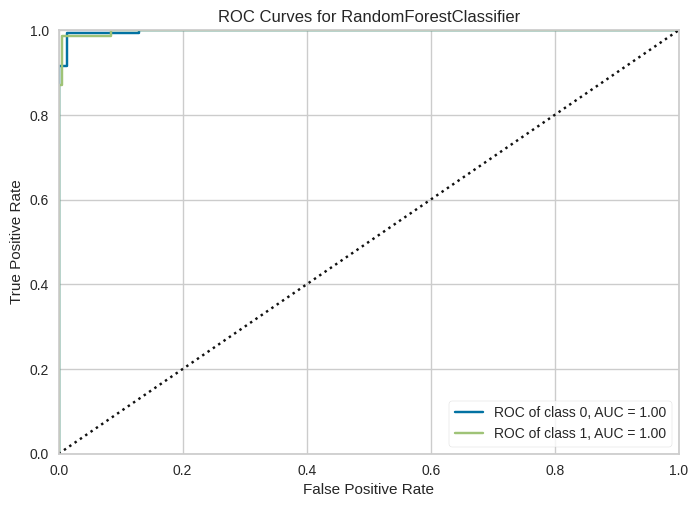

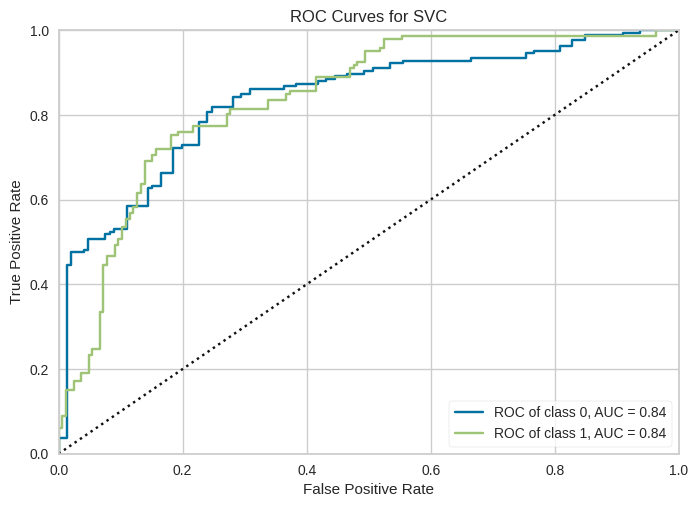

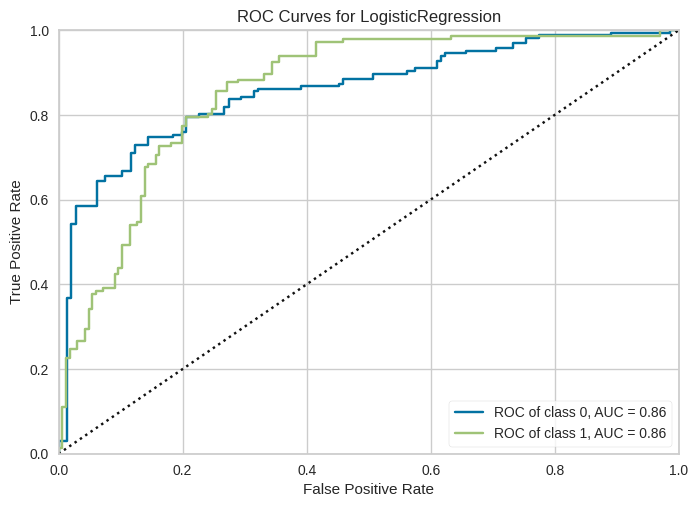

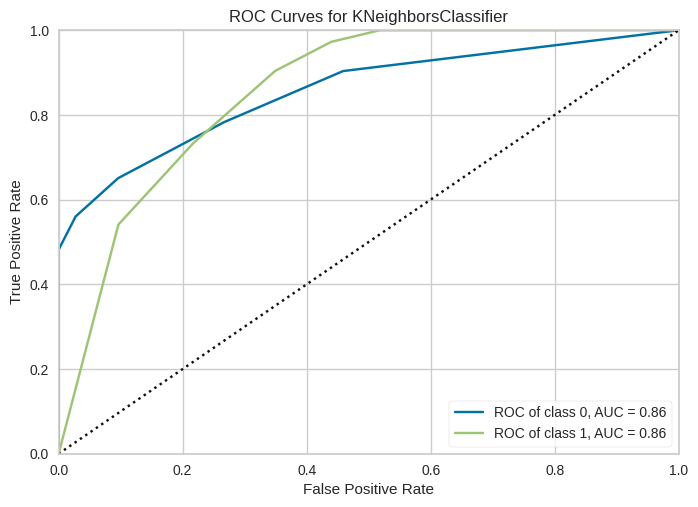

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [190]:
from yellowbrick.classifier import ROCAUC

# Define the classifiers
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()

# Create the visualizer
visualizer = ROCAUC(rf, classes=["0", "1"], micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ROCAUC(svc, classes=["0", "1"], micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ROCAUC(lr, classes=["0", "1"], micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ROCAUC(knn, classes=["0", "1"], micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


##Confusion Matrix

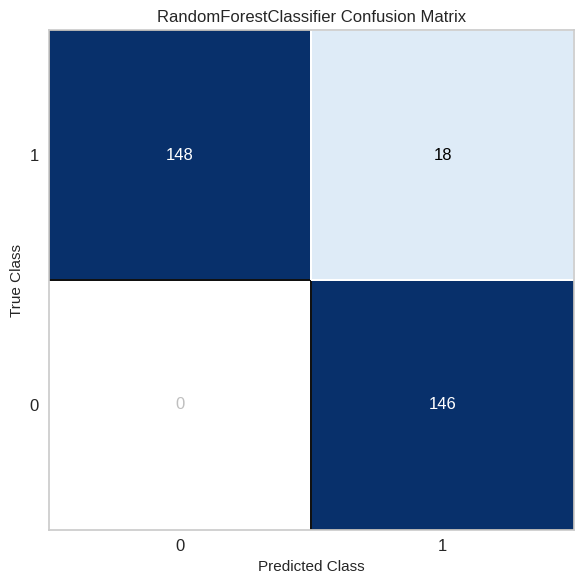

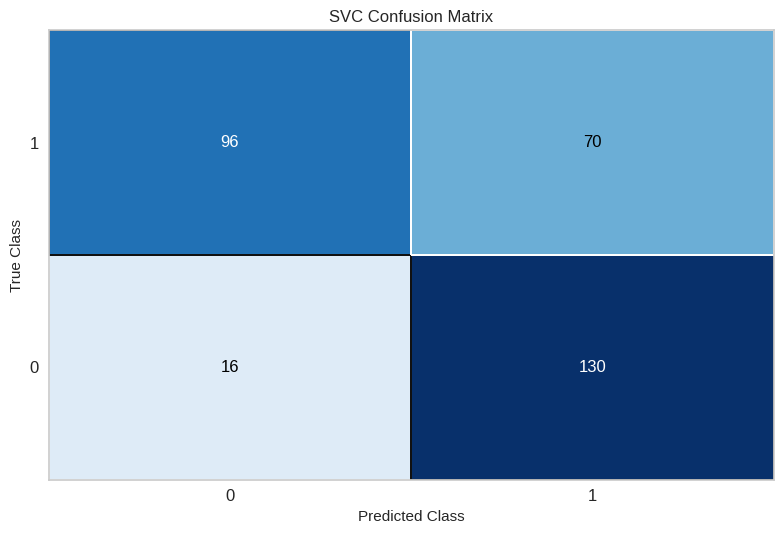

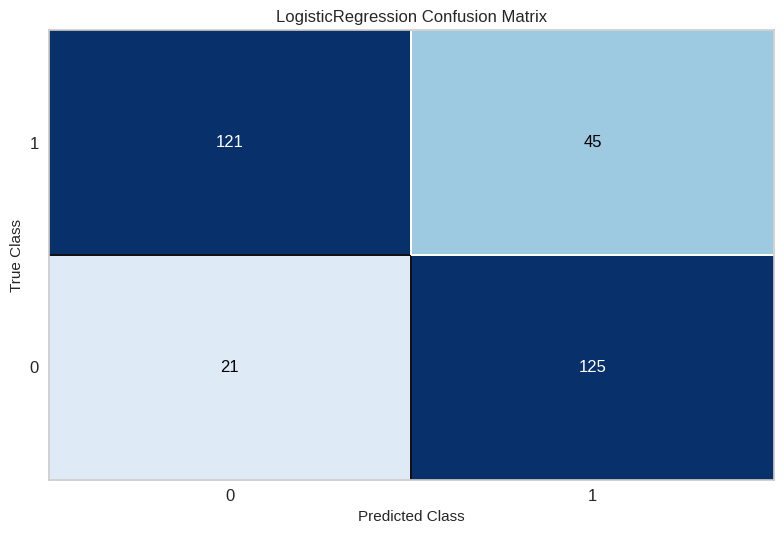

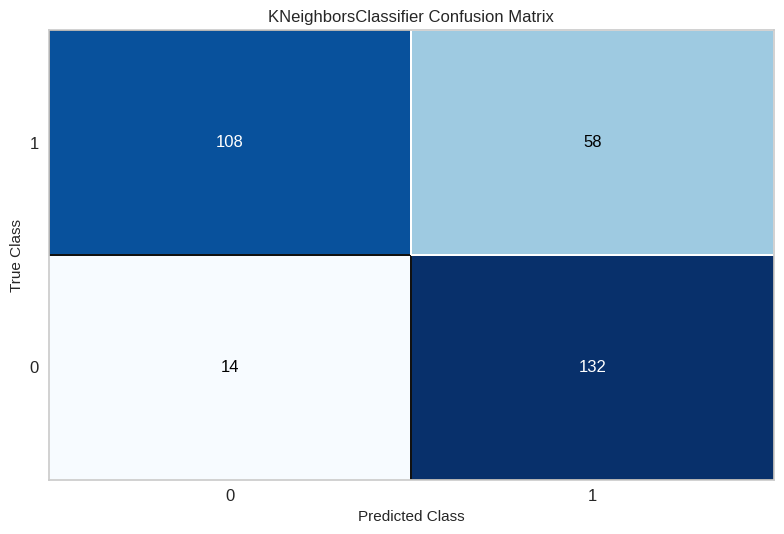

In [191]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Set the size of the figure
plt.gcf().set_size_inches(6, 6)

# Instantiate the classification models
models = [('Random Forest', RandomForestClassifier(random_state=42)),
          ('Support Vector', SVC(random_state=42)),
          ('Logistic Regression', LogisticRegression(random_state=42)),
          ('K-Nearest Neighbors', KNeighborsClassifier())
         ]

# Plot the confusion matrix for each model
for name, model in models:
    cm = ConfusionMatrix(model, classes=['0', '1'], cmap='Blues')

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.ax.set_xticklabels(cm.classes_, rotation=0) # rotate x-axis labels and set fontsize
    cm.ax.set_yticklabels(cm.classes_)
    cm.poof() 






##Models Learning Curve

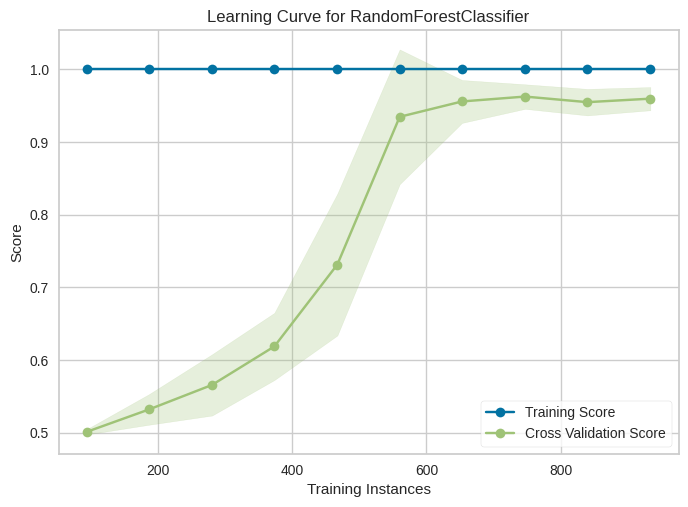

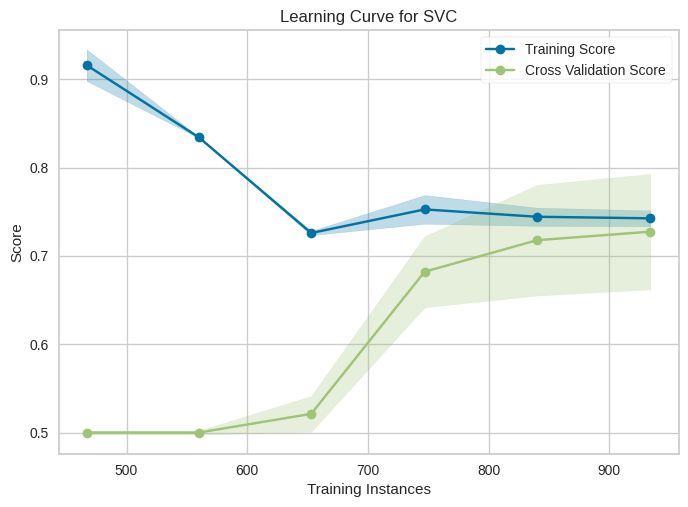

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

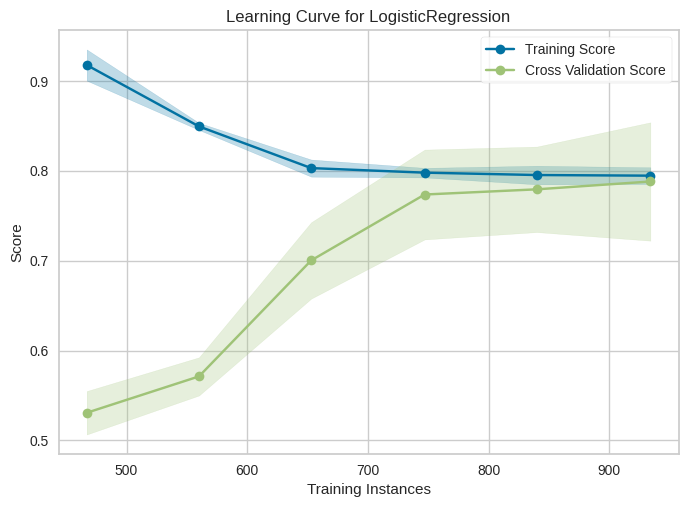

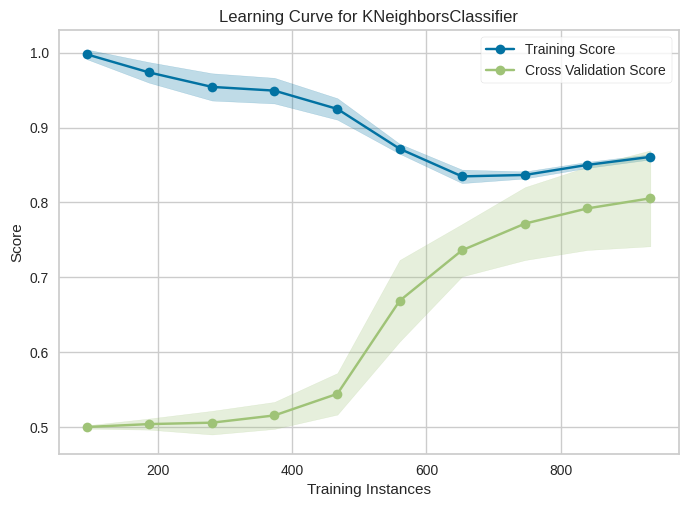

In [192]:

from yellowbrick.model_selection import LearningCurve

# Instantiate the classification models
models = [    ('Random Forest', RandomForestClassifier(random_state=42)),    ('Support Vector', SVC(random_state=42)),    ('Logistic Regression', LogisticRegression(random_state=42)),    ('K-Nearest Neighbors', KNeighborsClassifier())]

# Plot the learning curve for each model
for name, model in models:
    viz = LearningCurve(
        model, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    viz.fit(X_resampled, y_resampled)
    viz.poof()

##Precision - Recall Curve

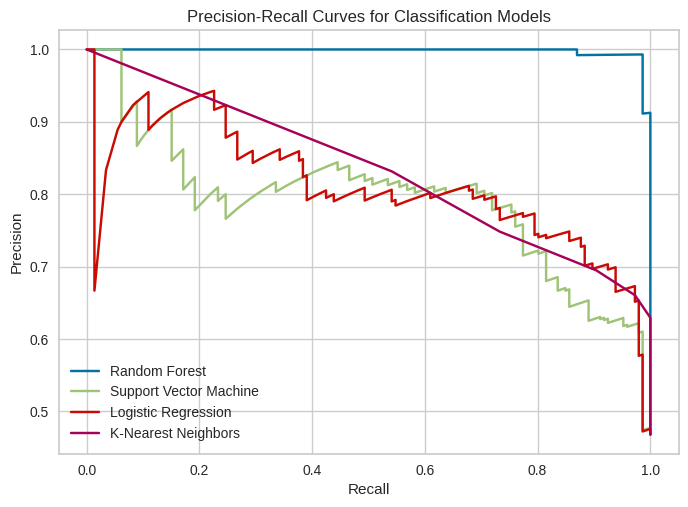

In [193]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve for each classifier
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
svc_precision, svc_recall, _ = precision_recall_curve(y_test, svc.decision_function(X_test))
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:,1])

# Plot precision-recall curves
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(svc_recall, svc_precision, label='Support Vector Machine')
plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(knn_recall, knn_precision, label='K-Nearest Neighbors')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Classification Models')
plt.legend()

# Display the plot
plt.show()
